In [1]:
#导入必要库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


加载加州房价数据集

In [2]:
#1.加载加州房价数据集
california = fetch_california_housing()

#将数据转化为DataFrame格式
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['MedHouseVal'] = california.target


d:\miniconda\envs\math\Lib\site-packages\sklearn\datasets\_base.py:1518: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


In [3]:
print("前5行数据：")
print(california_df.head())
print("\n数据描述：")
print(california_df.describe())

前5行数据：
   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  8.3252      41.0  6.984127  ...     37.88    -122.23        4.526
1  8.3014      21.0  6.238137  ...     37.86    -122.22        3.585
2  7.2574      52.0  8.288136  ...     37.85    -122.24        3.521
3  5.6431      52.0  5.817352  ...     37.85    -122.25        3.413
4  3.8462      52.0  6.281853  ...     37.85    -122.25        3.422

[5 rows x 9 columns]

数据描述：
             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  20640.000000  20640.000000  ...  20640.000000  20640.000000
mean       3.870671     28.639486  ...   -119.569704      2.068558
std        1.899822     12.585558  ...      2.003532      1.153956
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.563400     18.000000  ...   -121.800000      1.196000
50%        3.534800     29.000000  ...   -118.490000      1.797000
75%        4.743250     37.000000  ...   -118.010000      2.647250
max       15.0

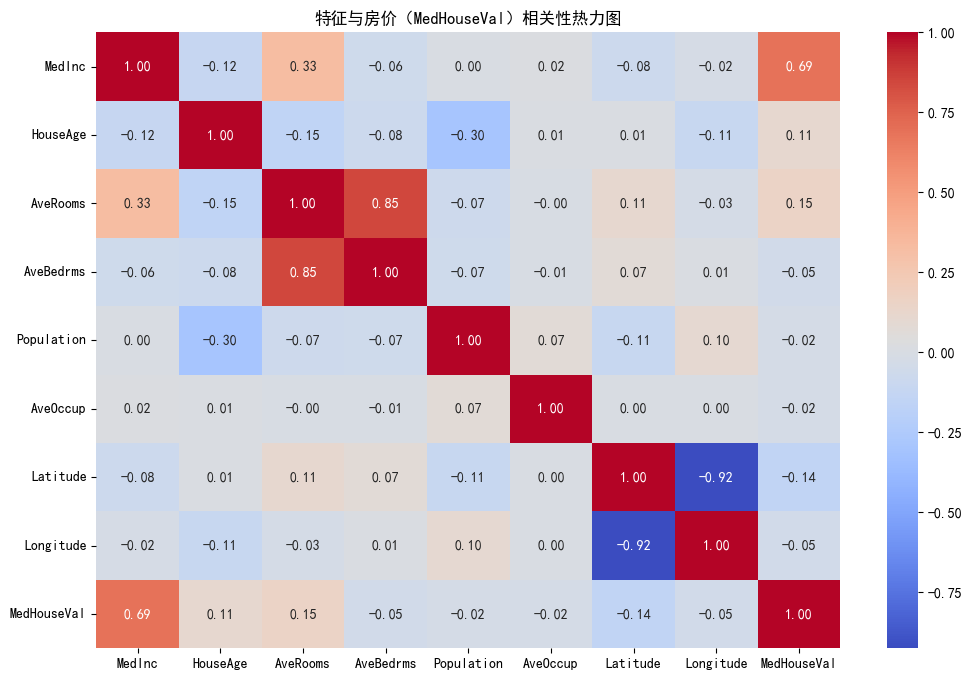

In [9]:
#查看特征之间的相关性
#热力图
plt.figure(figsize=(12, 8))
sns.heatmap(california_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('特征与房价（MedHouseVal）相关性热力图')
plt.show()

特征选择与目标变量设定

In [10]:
features = ['MedInc', 'AveRooms', 'HouseAge']
X = california_df[features]
y = california_df['MedHouseVal']

特征标准化处理

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

建立并训练多元线性回归模型

In [12]:
model = LinearRegression()
model.fit(X_scaled, y)
predictions = model.predict(X_scaled)

模型预测与评估

In [15]:
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)

print(f"模型系数（β）:", model.coef_)
print(f"模型截距（β0）:{model.intercept_:.4f}")
print(f"均方误差（MSE）: {mse:.4f}")
print(f"均方根误差（RMSE）: {rmse:.4f}")
print(f"决定系数（R²）: {r2:.4f}")

模型系数（β）: [ 0.84115114 -0.06718067  0.21171013]
模型截距（β0）:2.0686
均方误差（MSE）: 0.6497
均方根误差（RMSE）: 0.8060
决定系数（R²）: 0.5121


预测结果与真实房价对比图

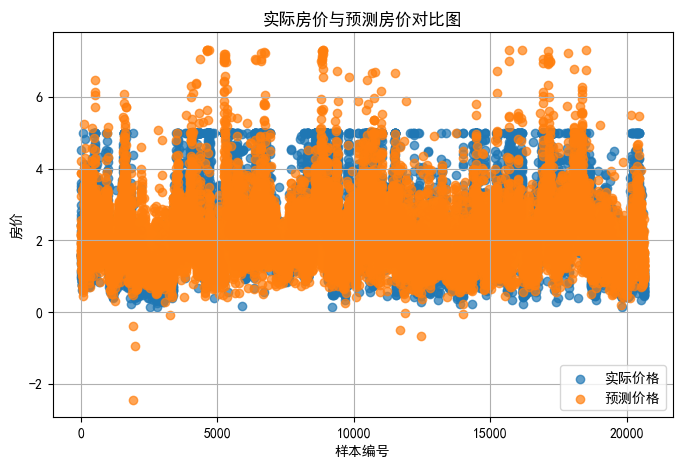

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y)), y, label = '实际价格', alpha=0.7)
plt.scatter(range(len(y)), predictions, label = '预测价格', alpha=0.7)
plt.title('实际房价与预测房价对比图')
plt.xlabel('样本编号')
plt.ylabel('房价')
plt.legend()
plt.grid(True)
plt.show()


扩展任务1：残差分析（Residual Analysis）

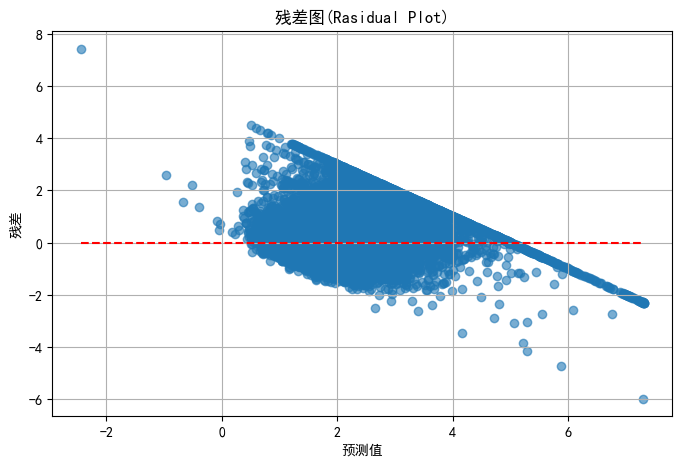

In [31]:
residuals = y - predictions
plt.figure(figsize=(8, 5))
plt.scatter(predictions, residuals, alpha=0.6)  # 根据残差的大小改变颜色
plt.hlines(y = 0, xmin = predictions.min(), xmax = predictions.max(), colors='r', linestyles='--')
plt.title('残差图(Rasidual Plot)')
plt.xlabel('预测值')
plt.ylabel('残差')
plt.grid(True)
plt.show()

扩展任务2：交叉验证（Cross-validation）

In [ ]:
cross_val_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2') #5折交叉验证
print(f"5折交叉验证的R²得分: {cross_val_scores}")
#打印平均交叉验证得分
print(f"平均R²得分: {np.mean(cross_val_scores):.4f}")

5折交叉验证的R²得分: [0.460717   0.39491883 0.48956221 0.40375787 0.54777794]
平均R²得分: 0.4593


扩展任务3：误差分布分析（误差是否符合正态分布）

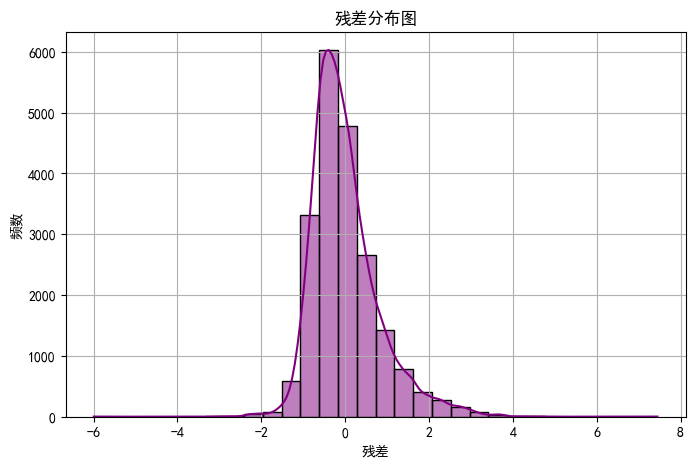

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple') #绘制残差的直方图和核密度估计
plt.title('残差分布图')
plt.xlabel('残差')
plt.ylabel('频数')
plt.grid(True)
plt.show()

扩展任务4：保存回归分析结果到CSV

In [ ]:
results_df = pd.DataFrame({
    '特征名称': features,
    '回归系数': model.coef_
})

summary_df = pd.DataFrame({
    '项': ['截距', 'MSE', 'RMSE', 'R²', '交叉验证均值R²'],
    '值': [model.intercept_, mse, rmse, r2, cross_val_scores.mean()]
})

full_results_df = pd.concat([results_df, pd.DataFrame([{}]), summary_df], ignore_index=True)
full_results_df.to_csv("regression_results.csv", index=False, encoding='utf-8-sig')
print("✅ 回归分析结果已保存至 regression_results.csv")

# ✅ 可选扩展任务 5：保存预测值和残差
pred_df = pd.DataFrame({
    '实际房价': y,
    '预测房价': predictions,
    '残差': residuals
})
pred_df.to_csv("predictions_residuals.csv", index=False, encoding='utf-8-sig')
print("✅ 预测值与残差数据已保存至 predictions_residuals.csv")

### 多元线性回归通过组合多个具有解释性的特征（如MedInc、AveRooms等），
1. 能够有效提升对房价预测的准确度。标准化处理帮助模型更快收敛，
2. 回归系数可以解释每个变量对房价的边际影响。

3. 增加残差图可辅助判断模型是否存在非线性偏差；
4. 交叉验证则帮助我们评估模型泛化能力；
5. 残差的分布分析可以验证误差项的正态性，辅助后续改进建模方法；
6. 保存结果有助于学生回顾学习过程并进行汇报展示。